In [52]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [53]:
dataset_path = '../../data/benchmark/lt2_windows__cvs_gt2.csv'
# dataset_path = '../../data/benchmark/multiple_windows.csv'

n_preds_path = '../../data/benchmark/preds2/n_bilstm.npy'
c_preds_path = '../../data/benchmark/preds2/c_bilstm.npy'
# n_preds_path = '../../data/benchmark/preds/n_bilstm_mw.npy'
# c_preds_path = '../../data/benchmark/preds/c_bilstm_mw.npy'

In [54]:
data_df = pd.read_csv(dataset_path)
data_df.head()

,protein,cleavages
0,AAADSAQWLSVKEETIFLHDGLIRVTDLAELPSEILGAPEAADTDL...,"[(52, 63), (17, 25), (52, 62)]"
1,ACAWLEAQEEEEVGFPVRPQVPLRPMTYKAAVDLSHFLKEKGGLEG...,"[(29, 37), (141, 150), (141, 149)]"
2,AFAQRALSDSLSRRLRRHVPTHQSRRRSLGHLSPTARRACEDAIRC...,"[(108, 116), (92, 100), (103, 112), (74, 82), ..."
3,AWRRRRSGTSGKATWWCSGLRRASPTPSRRVQSWATAVMWKPSPSS...,"[(224, 232), (225, 233), (219, 232), (65, 73)]"
4,DHVASCGVNLYQFYGPSGQFTHEFDGDEQFYVDLEKKETAWRWPEF...,"[(38, 46), (22, 31), (22, 32), (41, 49), (22, ..."


In [55]:
c_preds = np.load(c_preds_path, allow_pickle=True)
n_preds = np.load(n_preds_path, allow_pickle=True)

n_preds.shape, c_preds.shape

((867,), (867,))

In [56]:
cleavages = data_df['cleavages'].apply(literal_eval).values
seq_lens = data_df['protein'].apply(len).values

In [57]:
n_targets = [np.zeros(seq_len + 1) for seq_len in seq_lens]
c_targets = [np.zeros(seq_len + 1) for seq_len in seq_lens]

for i, cleavage in enumerate(cleavages):
    for n, c in cleavage:
        n_targets[i][n - 1] = 1
        c_targets[i][c - 1] = 1

In [58]:
n_preds[1][:100]

array([-3.2045133 , -3.0644724 , -1.408026  , -2.5832248 , -0.44022518,
       -2.1950707 , -2.823868  , -0.38425207, -0.3735503 , -1.8601568 ,
        0.02383512, -2.1377647 , -2.3594515 , -3.8930326 ,  0.07437387,
       -2.7454762 , -2.9066367 , -1.9665983 , -3.4921436 , -2.6278203 ,
       -0.30534035, -2.2129552 , -3.0399616 , -0.46046   , -3.767939  ,
       -1.0728917 , -2.1627965 , -3.7752395 , -0.542604  , -0.33313546,
       -1.0053073 , -2.2808053 , -2.7424672 , -2.1569288 , -0.915859  ,
       -2.3251555 , -0.16411853, -3.8421817 , -0.30619296, -3.5005846 ,
       -2.7760854 , -2.780663  , -1.3426548 , -1.5695144 , -3.1111577 ,
       -1.4744104 , -2.3218412 , -0.41199258, -3.8716834 , -2.6851134 ,
       -2.6471095 ,  0.8338969 , -1.803036  , -2.7413776 , -2.3006647 ,
       -0.27255052, -3.5176506 , -2.470628  , -4.0747695 , -2.0933304 ,
        0.03494543, -1.4781314 , -0.59190464, -3.2157302 , -2.6623993 ,
       -1.9971602 , -0.2703954 , -0.92445886, -3.7382371 , -4.34

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [60]:
n_preds = [sigmoid(pred) for pred in n_preds]
c_preds = [sigmoid(pred) for pred in c_preds]

In [61]:
n_preds[0], n_targets[0]

(array([0.47876072, 0.5029633 , 0.07842755, 0.14323705, 0.12321841,
        0.48906526, 0.04013983, 0.03583249, 0.18274674, 0.4774193 ,
        0.02608224, 0.14954412, 0.14144686, 0.3850394 , 0.05950657,
        0.06935667, 0.47075415, 0.19519816, 0.10516324, 0.05621112,
        0.22311105, 0.08618405, 0.2435909 , 0.31173128, 0.29806244,
        0.06920571, 0.12242689, 0.03868599, 0.73293287, 0.06250806,
        0.45553225, 0.03728284, 0.24892925, 0.08303662, 0.09686234,
        0.06921058, 0.09772661, 0.4429918 , 0.02311199, 0.41711235,
        0.2604124 , 0.07043609, 0.20962507, 0.18779391, 0.05252269,
        0.32656884, 0.14496736, 0.08137866, 0.23375149, 0.05961177,
        0.16208184, 0.41056636, 0.07572564, 0.02312028, 0.27686352,
        0.05322523, 0.19059572, 0.08273079, 0.05685503, 0.37363422,
        0.2068649 , 0.22957133, 0.02907626, 0.10430396, 0.470769  ,
        0.05402324, 0.01812214, 0.04460135, 0.21787813, 0.24422844,
        0.02125387, 0.42603716, 0.14595233, 0.21

In [62]:
n_preds[0] - n_targets[0]

array([ 0.47876072,  0.5029633 ,  0.07842755,  0.14323705,  0.12321841,
        0.48906526,  0.04013983,  0.03583249,  0.18274674,  0.47741929,
        0.02608224,  0.14954412,  0.14144686,  0.38503939,  0.05950657,
        0.06935667, -0.52924585,  0.19519816,  0.10516324,  0.05621112,
        0.22311105,  0.08618405,  0.24359091,  0.31173128,  0.29806244,
        0.06920571,  0.12242689,  0.03868599,  0.73293287,  0.06250806,
        0.45553225,  0.03728284,  0.24892925,  0.08303662,  0.09686234,
        0.06921058,  0.09772661,  0.44299179,  0.02311199,  0.41711235,
        0.2604124 ,  0.07043609,  0.20962507,  0.18779391,  0.05252269,
        0.32656884,  0.14496736,  0.08137866,  0.23375149,  0.05961177,
        0.16208184, -0.58943364,  0.07572564,  0.02312028,  0.27686352,
        0.05322523,  0.19059572,  0.08273079,  0.05685503,  0.37363422,
        0.20686489,  0.22957133,  0.02907626,  0.10430396,  0.47076899,
        0.05402324,  0.01812214,  0.04460135,  0.21787813,  0.24

In [63]:
c_preds_concat = np.concatenate(c_preds)
n_preds_concat = np.concatenate(n_preds)

c_targets_concat = np.concatenate(c_targets)
n_targets_concat = np.concatenate(n_targets)

c_preds_concat.shape, n_preds_concat.shape, c_targets_concat.shape, n_targets_concat.shape

((397783,), (397783,), (397783,), (397783,))

In [64]:
from sklearn import metrics

In [65]:
fpr_c, tpr_c, thresholds_c = metrics.roc_curve(c_targets_concat, c_preds_concat)
fpr_n, tpr_n, thresholds_n = metrics.roc_curve(n_targets_concat, n_preds_concat)

roc_auc_c = metrics.auc(fpr_c, tpr_c)
roc_auc_n = metrics.auc(fpr_n, tpr_n)

print(f"C - Terminus ROC AUC: {roc_auc_c}")
print(f"N - Terminus ROC AUC: {roc_auc_n}")

C - Terminus ROC AUC: 0.4727632251547016
N - Terminus ROC AUC: 0.6774328159481535


In [66]:
import matplotlib.pyplot as plt

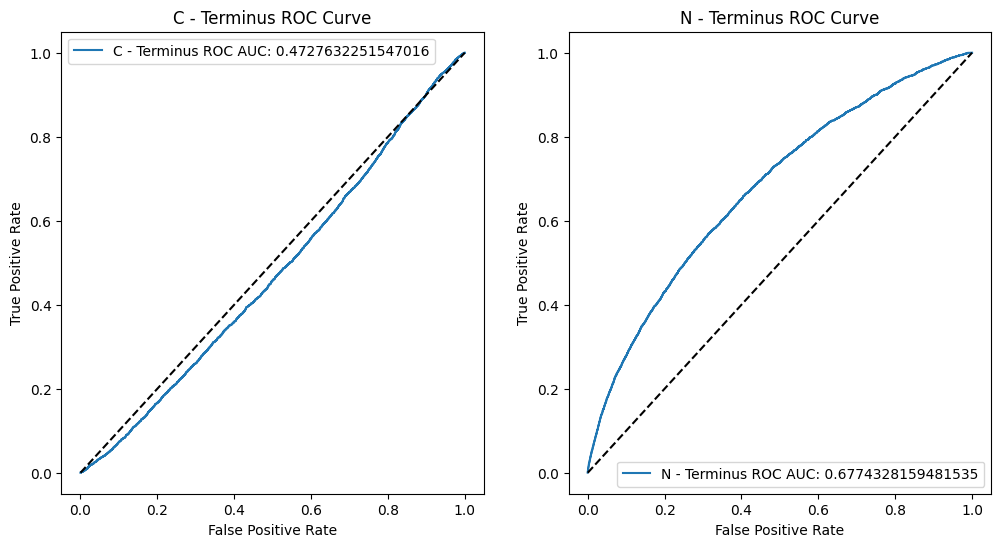

In [67]:
# plot ROC curves for both models (on separate plots):

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(fpr_c, tpr_c, label=f"C - Terminus ROC AUC: {roc_auc_c}")
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('C - Terminus ROC Curve')
ax[0].legend()

ax[1].plot(fpr_n, tpr_n, label=f"N - Terminus ROC AUC: {roc_auc_n}")
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('N - Terminus ROC Curve')
ax[1].legend()

plt.show()

In [68]:
print(f"C Terminus Precission: {metrics.precision_score(c_targets_concat, c_preds_concat > 0.5)}")
print(f"N Terminus Precission: {metrics.precision_score(n_targets_concat, n_preds_concat > 0.5)}")

C Terminus Precission: 0.006300027391423441
N Terminus Precission: 0.030858369098712448


In [69]:
print(f"C Terminus Recall: {metrics.recall_score(c_targets_concat, c_preds_concat > 0.5)}")
print(f"N Terminus Recall: {metrics.recall_score(n_targets_concat, n_preds_concat > 0.5)}")

C Terminus Recall: 0.05578011317704123


N Terminus Recall: 0.19359181475498116


In [70]:
print(f"C Terminus F1: {metrics.f1_score(c_targets_concat, c_preds_concat > 0.5)}")
print(f"N Terminus F1: {metrics.f1_score(n_targets_concat, n_preds_concat > 0.5)}")

C Terminus F1: 0.011321373878801137
N Terminus F1: 0.053231657658991634


In [71]:
for i in range(10):
    pos_n_preds_idx = np.where(n_preds[i] > 0.5)[0]
    pos_c_preds_idx = np.where(c_preds[i] > 0.5)[0]
    pos_n_targets_idx = np.where(n_targets[i])[0]
    pos_c_targets_idx = np.where(c_targets[i])[0]

    print(f"Protein {i}")
    print(f"Positive N preds: {pos_n_preds_idx}")
    print(f"Positive N targets: {pos_n_targets_idx}")
    print()
    print(f"Positive C preds: {pos_c_preds_idx}")
    print(f"Positive C targets: {pos_c_targets_idx}")
    print()

Protein 0
Positive N preds: [ 1 28 75 86]
Positive N targets: [16 51]

Positive C preds: [ 8 18 25 28 51 59 63 74 80 89 97]
Positive C targets: [24 61 62]

Protein 1
Positive N preds: [ 10  14  51  60  74  79  90 105 129]
Positive N targets: [ 28 140]

Positive C preds: [ 15  21  28  38  47  52  60  67  74  82  88 103 111 117 128 130 138 145
 150]
Positive C targets: [ 36 148 149]

Protein 2
Positive N preds: [  5  15  41  70 158 172 195 216 230 245 263 268 289 309 349 403 407 412
 415 433 447 458 465 478 485 500 518 534 538 540 560 575]
Positive N targets: [ 73  91 102 107 309]

Positive C preds: [  2  11  25  58  70  81  92 102 112 121 142 152 177 184 191 203 248 260
 281 284 289 297 311 338 362 372 379 388 391 415 426 432 445 450 460 466
 476 488 503 527 537 573 584]
Positive C targets: [ 81  99 111 115 319]

Protein 3
Positive N preds: [ 20  23  46  74  87 103 119 135 151 201 218 223 250]
Positive N targets: [ 64 218 223 224]

Positive C preds: [  2  20  34  40  51  63  73  88 104 